In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib

## What is matplotlib?
* plotting library for Python and NumPy
* originally written by John D. Hunter in 2003
* will not support Python 2 past 2020
* interfacable to GTK+ and Qt

Resources:
* [Matplotlib user guide](https://matplotlib.org/users/index.html)
* [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)

## Prerequisite: Everything in python is an object

* every object has its on methods
* check object id: `id()`
* check type of object: `type()`
* check object methods: `dir()`


## Sidenote on mutable vs immutable objects
* immutable objects may not change in place: integer, float, boolean, string, tuple
* mutable objects may change: list, set, dictionary, most user-defined classes
* check mutability via the object ID (memory location)

## Example immutable object
* changing an immutable object creates a new object

In [2]:
word = "Hello"
print(id(word))
word = word + " World!"
print(id(word))

140618511029560
140618511106416


## Example mutable object
* object id stays the same on change

In [3]:
my_list = ['Hello']
print(id(my_list))
my_list.append('World!')
print(id(my_list))

140645971701448
140645971701448


## Assigning mutable object
* if assigning a mutable object, it will create a view of the data
* also happens when assigning slices of data
* a real copy can be made by using `.copy()`

In [5]:
# immutable object
str1 = 'hello'
print(str1)

str2 = str1
str2 = 'bye'

# print initial string again
print(str1)

hello
hello


In [6]:
# mutable 2x2 array (similar to a list)
A = np.zeros([2, 2])
print(A)

B = A
B[1,0] = 1

# print initial array again
print(A)

# look at object id
print('Id A:', id(A))
print('Id B:', id(B))

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [1. 0.]]
Id A: 140645968720240
Id B: 140645968720240


## Function and class parameters
* parameters are passed by assignment
* mutable objects are effectively passed by reference (lists, set, dictionaries...)
* immutable objects are effectively passed by value (integer, doulbe, boolean, string, tuple...) 

In [7]:
# immutable object
def modify_number(par):
    par = par + 1

# numbers are immutable
val = 1
modify_number(val)
print("val = {}".format(val))

val = 1


In [8]:
# mutable object
def modify_list(par):
    par.append("bar")

# lists are mutable
lst = ["foo"]
modify_list(lst)
print("lst = {}".format(lst))

lst = ['foo', 'bar']


# Now on to matplotlib

## Two distinct plotting styles in matplotlib
* MATLAB plotting style through pyplot
* object oriented plotting style (officially recommended)

## Pyplot interface
* everything is done with `plt.***`
* you do not have to think about what objects you are handling
* you have to know which "state" you are in, "stateful interface"
* depending on what you are doing you can reach its limits pretty fast

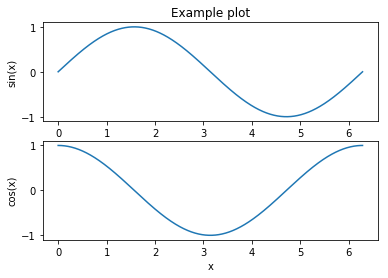

In [9]:
x = np.linspace(0, 2*np.pi, 1000)
plt.figure()

plt.subplot(211)
plt.title('Example plot')
plt.plot(x, np.sin(x))
plt.ylabel('sin(x)')

plt.subplot(212)
plt.plot(x, np.cos(x))
plt.xlabel('x')
plt.ylabel('cos(x)')

plt.show()

## Object-oriented interface
* gives you many more options to edit your plot
* allows you to adress every object in your plot and modify it directly, "stateless interface"
* all functions of pyplot exist as methods of objects
* usually begins with defining the figure and axes: `fig, ax = plt.subplots()`

## Hierachy in matplotlib
<img src="https://matplotlib.org/1.5.1/_images/fig_map.png" width="700" height="700" />

## A word on Artists
* everything you can plot is in principle an `Artist` instance which interacts with the renderer
* split up in containers and primitives
* `Figure`, `Axes`, `Axis` and `Tick` are containers which can contain lower containers and multiple primitives
* primitives are stored in containers as lists
* an `Artist` cannot be contained in multiple containers
<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--KMJNInQX--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/la33f9zwg65hqjz9j4ee.png" width="600" height="600" />

## Objects in matplotlib
<img src="http://matplotlib.org/_images/anatomy.png" width="600" height="600" />

## Figure
* instance of your complete figure
* allows you to modify general attributes of the plot: size, background colour, edge colour, resolution...
* allows you to use general methods of a figure (`fig.savefig()` is the same as `plt.savefig()`)
* contains axes instances

In [10]:
# create an empty figure object, width and height are in inches
fig = plt.figure(figsize=(1,0.5), dpi=300, facecolor='blue', edgecolor='black')

# show object type
print('This object is a:', type(fig))

# show object id
print('Figure id:', id(fig))

# print list of axes
print(fig.axes)

This object is a: <class 'matplotlib.figure.Figure'>
Figure id: 140645968942640
[]


<Figure size 300x150 with 0 Axes>

Axes objects: [<matplotlib.axes._subplots.AxesSubplot object at 0x7feaaee8ec50>, <matplotlib.axes._subplots.AxesSubplot object at 0x7feaaee3ef60>, <matplotlib.axes._subplots.AxesSubplot object at 0x7feaaee594e0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7feaaee70a58>]
Axes 1 id: 140645933575248


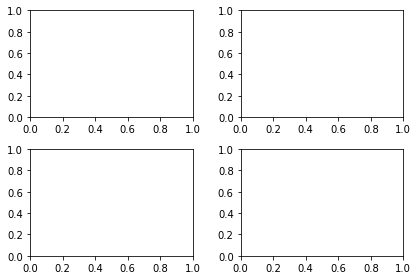

In [12]:
# now create a figure object which contains several axes
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2)

# print the list of axes objects
print('Axes objects:', fig.axes)

# each axes is an object 
print('Axes 1 id:', id(ax1))
fig.tight_layout()

## Axes
* instance of a plotting area
* "matplotlib.axes.Axes is the center of the matplotlib universe" - Artist tutorial
* `Axes` instances have access to everything you probably want to do in your plot
* allows to define subplots, projection, shared x or y axis...
* contains axis, lines, points, annotations, title...

Figure type: <class 'matplotlib.figure.Figure'>
Axes type: <class 'matplotlib.axes._subplots.AxesSubplot'>
Parent figure: Figure(432x288)
My x-axis: XAxis(54.000000,36.000000)
My y-axis: YAxis(54.000000,36.000000)


AttributeError: 'Figure' object has no attribute 'xaxis'

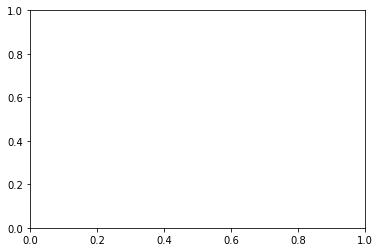

In [13]:
# make Figure and Axes which belongs to 'fig'
fig, ax = plt.subplots()

# this method is equivalent
# fig = plt.figure() # make Figure
# ax = fig.add_subplot(1,1,1)    make Axes belonging to fig
# ax = plt.axes()                make Axes belonging to fig, but also creates a figure if not defined
# ax = fig.add_axes()            allows you to add an axes any where you like

# show object types
print('Figure type:', type(fig))
print('Axes type:', type(ax))

# axes knows about the figure it is in and about its own axis
print('Parent figure:', ax.figure)
print('My x-axis:', ax.xaxis)
print('My y-axis:', ax.yaxis)

# but figure has no connection to any axis
print(fig.xaxis)

## Example: subplots
* In pylab via: `plt.subplot(<rows>, <columns>, <plot number>)`, which makes the created subplot the current plot and returns the axes object. You have to know which state you are in!


* Or in an object oriented way: `plt.subplots(<rows>, <columns>)`, which returns the figure and a list of all the axes objects which gives you more control. Now the command order does not play any role!

Line objects in axes 1: [<matplotlib.lines.Line2D object at 0x7feaaec8dc50>]


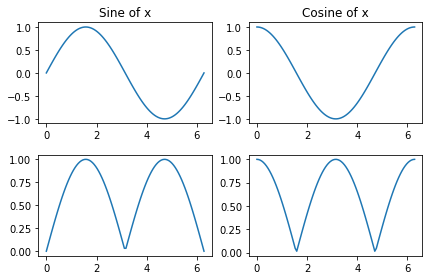

In [15]:
x = np.linspace(0, 2*np.pi, 100)

# create a figure object which contains several axes
# you can either use fig.axes[0], fig.axes[1], ... or unpack directly
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2)

ax1.set_title('Sine of x')
ax1.plot(x, np.sin(x)) # This creates a line instance in axes 1
print('Line objects in axes 1:', ax1.lines)


ax2.plot(x, np.cos(x))

ax3.plot(x, np.abs(np.sin(x)))

ax4.plot(x, np.abs(np.cos(x)))
ax2.set_title('Cosine of x')
fig.tight_layout()

## Axis
* instance of an axis
* allows you to set tick location, formats
* allows you to set labels (`ax.set_xlabel` actually sets `ax.xaxis.label`)
* contains ticks and labels

Major x-axis tick objects: [<matplotlib.axis.XTick object at 0x7feaaebc2978>, <matplotlib.axis.XTick object at 0x7feaaec300b8>, <matplotlib.axis.XTick object at 0x7feaaec30358>]

X label: Text(0.5, 0, 'This is the x-axis')


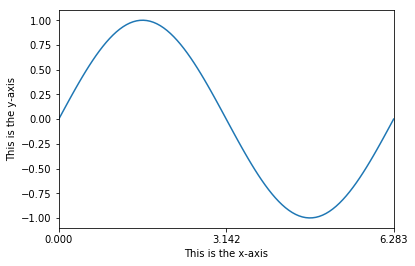

In [16]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('This is the x-axis')
ax1.set_ylabel('This is the y-axis')
ax1.set_xlim([0, 2*np.pi])
ax1.set_xticks([0, np.pi, 2*np.pi])
ax1.plot(x, np.sin(x))

# print list of major ticks
print('Major x-axis tick objects:', ax1.xaxis.majorTicks)

# print label object
print('\nX label:', ax1.xaxis.label)

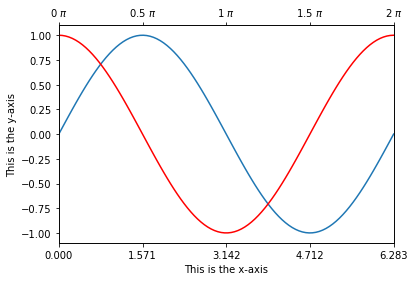

In [17]:
# example of locator and formatter
import matplotlib.ticker as tck

fig, ax1 = plt.subplots()

ax1.set_xlabel('This is the x-axis')
ax1.set_ylabel('This is the y-axis')
ax1.set_xlim([0, 2*np.pi])
ax1.plot(x, np.sin(x))
ax1.xaxis.set_major_locator(tck.MultipleLocator(base=0.5*np.pi))

# Mirror x axis, actually creates a second axes overlayed over the first one
ax2 = ax1.twiny()
ax2.set_xticks([0*np.pi, 0.5*np.pi, 1.0*np.pi, 1.5*np.pi, 2.0*np.pi])

# set xaxis format to units of pi
ax2.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax2.set_xlim([0, 2])
ax2.plot(x/np.pi, np.cos(x), color='red')
plt.show()

## Example: Figure legend

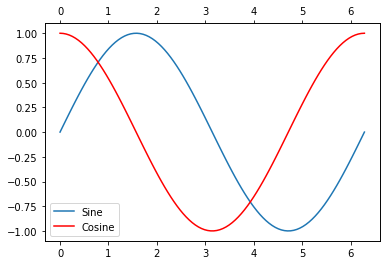

In [18]:
fig, ax1 = plt.subplots()
ax1.plot(x, np.sin(x), label='Sine')
ax2 = ax1.twiny()
ax2.plot(x, np.cos(x), color='red', label='Cosine')

# Each axes now has its own legend
# ax1.legend(loc='lower left')
# ax2.legend(loc='lower left')

# One solution would be to gather all labels
# handler1, label1 = ax1.get_legend_handles_labels()
# handler2, label2 = ax2.get_legend_handles_labels()
# ax1.legend(handler1+handler2, label1+label2, loc='lower left')

# A better solution is to use the legend on the figure level
fig.legend(loc='lower left', bbox_to_anchor=(0,0), bbox_transform=ax1.transAxes)

plt.show()

## You can switch from Pyplot interface to object oriented interface

* you can get the current figure by using `fig = plt.gcf()`
* you can get the current axes by using `ax = plt.gca()`

# General tips on making plots

## You can use style sheets

* easy-to-switch predefined plotting styles
* possible to write own styles to a file

['_classic_test', 'seaborn', 'fivethirtyeight', 'seaborn-ticks', 'seaborn-white', 'seaborn-colorblind', 'dark_background', 'seaborn-talk', 'tableau-colorblind10', 'classic', 'seaborn-muted', 'fast', 'seaborn-whitegrid', 'seaborn-poster', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'ggplot', 'seaborn-dark', 'bmh', 'seaborn-paper', 'seaborn-notebook', 'seaborn-bright', 'Solarize_Light2', 'grayscale']


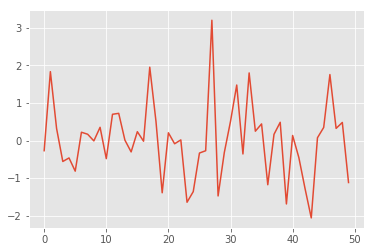

In [19]:
# show all styles which are available
print(plt.style.available)

# use for example ggplot style
plt.style.use('ggplot')
data = np.random.randn(50)
plt.figure()
plt.plot(data)

plt.rcdefaults()

## You can change general settings using rcParams
* allows to change the default matplotlib settings for a script/shell dynamically
* reset everything to default with `rcdefaults()`

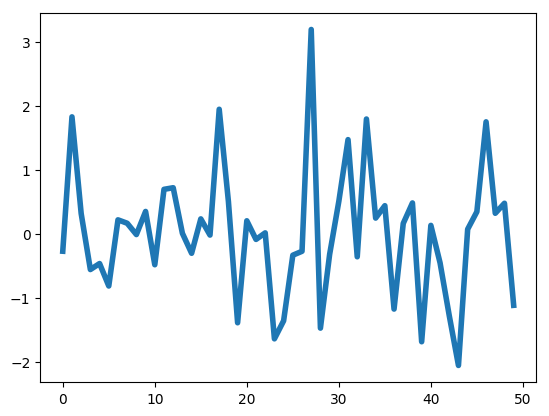

In [20]:
plt.rcParams['lines.linewidth'] = 4
plt.figure()
plt.plot(data)

plt.rcdefaults()

## What colors should I use?
* think about what quantity you want to show
* often the viewer has an expectation of certain colors


* sequential colourmaps are good for quantities which do not change sign (density, pressure...)
* diverging colourmaps are good for quantities which take both signs (velocity, magnetic fields...)
* cyclic colourmaps are good for cyclic quantities (phase...)
* qualitative colourmaps are good for data which is unrelated but shares the same axis (density and velocity over time)


* you can also define your own maps but they will probably not be optimal
* an overview can be found here: [colormap documentation](https://matplotlib.org/tutorials/colors/colormaps.html)

## Monotonic sequential colourmaps
<img src="https://matplotlib.org/_images/sphx_glr_colormaps_008.png"/>

## Monotonic sequential colourmaps in grayscale
<img src="https://matplotlib.org/_images/sphx_glr_colormaps_015.png" />

## Most standard colourmaps are all over the place
<img src="https://matplotlib.org/_images/sphx_glr_colormaps_014.png" />

## Most standard colourmaps are all over the place
<img src="https://matplotlib.org/_images/sphx_glr_colormaps_021.png" />

## I prefer less noisy colourmaps with only one or two colors
<img src="https://matplotlib.org/_images/sphx_glr_colormaps_009.png" />

## Here are the diverging colourmaps
<img src="https://matplotlib.org/_images/sphx_glr_colormaps_011.png" />

## What about lines?
* lines can also use sequential colours if they describe a similar quantity only with different parameters
* for completely unrelated quantities one should choose qualitative colours to emphasize the difference
* choosing colours which do not have too much saturation is often more easy on the eye
* the matplotlib version 3 standard colors do an ok job 

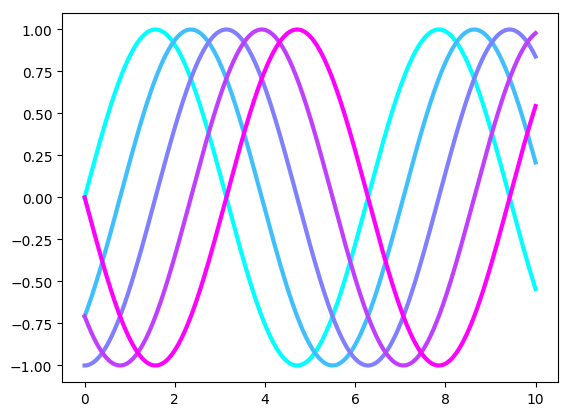

In [21]:
# lines using a colourmap
plt.figure()

n_lines = 5
x = np.linspace(0, 10, 1000)
phase_shift = np.linspace(0, np.pi, n_lines)

color_idx = np.linspace(0, 1, n_lines)
for i, shift in zip(color_idx, phase_shift):
    plt.plot(x, np.sin(x - shift), color=plt.cm.cool(i), lw=3)

plt.show()

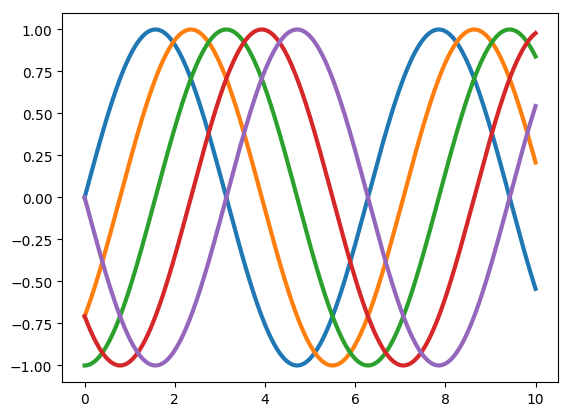

In [23]:
# lines using the matplotlib3 colours
plt.figure()

n_lines = 5
x = np.linspace(0, 10, 1000)
phase_shift = np.linspace(0, np.pi, n_lines)

for shift in phase_shift:
    plt.plot(x, np.sin(x - shift), lw=3)

plt.show()

## Be aware of colour deficiencies
* especially [red-green deficiency](http://www.color-blindness.com/red-green-color-blindness/) in 8% of men (0.5% women)
* [great tool on finding colours](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)

## What about fonts?
* fonts are grouped in typefaces, some of which are serif (roman), sans-serif (grotesque, gothic), monospace ...
* serif fonts are intended to be used in body text in order to increase legibility
* for short texts in plots, sans-serif fonts are easier on the eye
* font typeface (serif, sans-serif...) can be set globally by the `rcParam['font.family']`
* in matplotlib a font.family is an list in descending priority (if first font is not found go to second etc.)
* set a default font `rcParam['font.sans.serif] = "Comic Sans MS"` (DO NOT DO THIS!)
* bold and italic are set by `rcParam['font.style']`

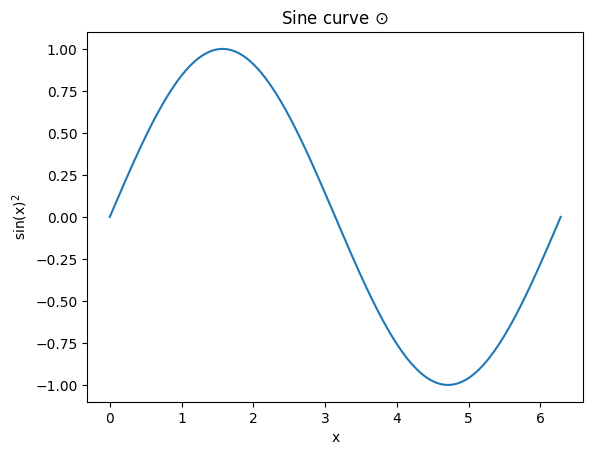

In [25]:
# matplotlib understands latex like math commands
plt.figure()
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(x, np.sin(x))
plt.title('Sine curve $\odot$')
plt.xlabel('x')
plt.ylabel('sin(x)$^2$')
plt.show()

## One can even use latex to render font
* be aware the standard latex font is a serif font
* use r'...' flag to switch to raw text and not treat backslashes as escapes

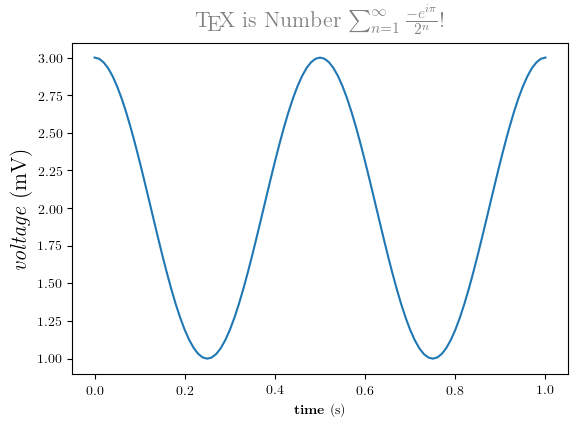

In [26]:
plt.figure()
# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s) ')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r'\TeX\ is Number $\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.show()
plt.rcdefaults()